In [1]:
#imports
from time import *
from sklearn import tree
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
from pandas_datareader import data as pdr
import yfinance as yfin
yfin.pdr_override()
import time
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
start_time = time.time()
import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

In [2]:
start = dt.datetime(2019,1,1)
end = dt.datetime(2020,12,31)

In [3]:
stockSymbol = 'QCOM'

In [4]:
df = pdr.get_data_yahoo(stockSymbol, start, end)

[*********************100%***********************]  1 of 1 completed


In [5]:
df.to_csv('QCOM.csv')

In [6]:
df1 = pd.read_csv('QCOM.csv', parse_dates = True)

In [7]:
acc = 10
Points = []
Highs = []
Lows = []
Volumes = []
dates = []
CashRecords = []

Cash = 100
Bought = False
days = 0
decision = 0

In [8]:
def algo(t,h,l,v):

    features = []
    labels = []

    for i in range(len(t) - acc):
        
        temp_t = t[acc + i - 1]
        temp_h = h[acc + i - 1]
        temp_l = l[acc + i - 1]
        temp_v = v[acc + i - 1]
        
        features.append([temp_t, temp_h, temp_l, temp_v])
    
        #1 means price went up
        if t[acc + i] > t[acc + i - 1]:
            labels.append([1])
        else:
            labels.append([0])
            
    clf = tree.DecisionTreeClassifier()
    clf.fit(features, labels)
    temp_list = []
    
    for i in range(acc):
        temp_list.append([])
        temp_list[i].append(t[-1*(acc - i)])
        temp_list[i].append(h[-1*(acc - i)])
        temp_list[i].append(l[-1*(acc - i)])
        temp_list[i].append(v[-1*(acc - i)])
        
    if clf.predict(temp_list)[0] == 1:
        return 1
    else:
        return 0

In [9]:
style.use('ggplot')

In [10]:
for i in df1[['Close']]:
    count = 0
    for j in df1[i]:
        Points.append(round(j,2))


In [11]:
for i in df1[['High']]:
    for j in df1[i]:
        Highs.append(round(j,2))

In [12]:
for i in df1[['Low']]:
    for j in df1[i]:
        Lows.append(round(j,2))

In [13]:
for i in df1[['Volume']]:
    for j in df1[i]:
        Volumes.append(round(j,2))

In [14]:
for i in df1[['Date']]:
    count = 0
    for j in df1[i]:
        dates.append(dt.datetime.strptime(j, "%Y-%m-%d"))

Ending Cash: 226.35
Expected Cash: 263.49
Performance: 85.91%


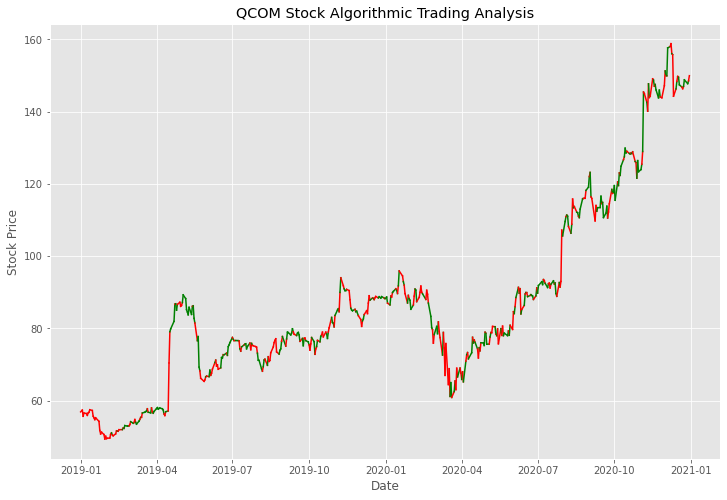

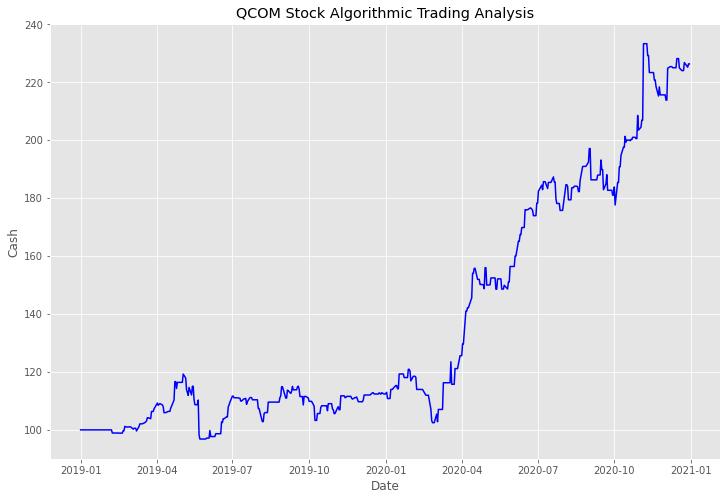

In [16]:
CashRecords = []
acc = 15
Cash = 100
Bought = False
days = 0
decision = 0

plt.figure(num = stockSymbol,figsize=(12, 8))
plt.title(stockSymbol + " Stock Algorithmic Trading Analysis")
plt.xlabel('Date')
plt.ylabel('Stock Price')


while days <= len(df1[['Close']]) - 1:
    
    #stock info
    days += 1
    StockPrice = Points[days - 1]
    
    if days == 1:
        initP = StockPrice
        initC = Cash
        exp=[]
        exp.append(Cash)
    
    exp.append(round(exp[-1]*StockPrice/Points[days-2],2))
        
    #your money
    if Bought == True:
        Cash = round(Cash*StockPrice/Points[days-2],2)
        c = "green"
    else:
        c = "red"
                  
    CashRecords.append(Cash)
    
    if days > acc:
        decision = algo(Points[:days],Highs[:days],Lows[:days],Volumes[:days])

    if Bought == True:
        if decision == 0:
            Bought = False
    else:
        if decision == 1:
            Bought = True
    
    plt.plot(dates[days - 2:days], Points[days-2:days], color=c)
    
print("Ending Cash: " + str(CashRecords[-1]))
print("Expected Cash: " + str(round(CashRecords[0] * Points[-1] / Points[0],2)))
print("Performance: " + str(round(100 * CashRecords[-1] * Points[0] / (Points[-1] * CashRecords[0]),2)) + "%")

plt.show()

plt.figure(num = stockSymbol,figsize=(12, 8))
plt.title(stockSymbol + " Stock Algorithmic Trading Analysis")
plt.xlabel('Date')
plt.ylabel('Cash')
plt.plot(dates, CashRecords, color='blue')
plt.show()

